## Problem Statement

The problem is to identify the sentiments of the user from their reviews.

Link to Dataset - https://www.kaggle.com/jessicali9530/kuc-hackathon-winter-2018

In [127]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/kuc-hackathon-winter-2018/drugsComTest_raw.csv
/kaggle/input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv


### **Data Description :**

drugName (categorical): name of drug

condition (categorical): name of condition

review (text): patient review

rating (numerical): 10 star patient rating

date (date): date of review entry

usefulCount (numerical): number of users who found review useful

The structure of the data is that a patient with a unique ID purchases a drug that meets his condition and writes a review and rating for the drug he/she purchased on the date. Afterwards, if the others read that review and find it helpful, they will click usefulCount, which will add 1 for the variable.

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')

In [129]:
#read the train and test data

test = pd.read_csv('/kaggle/input/kuc-hackathon-winter-2018/drugsComTest_raw.csv') #train data
train = pd.read_csv('/kaggle/input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv') #test data

### Data Pre-Processing and Data Exploration

In [130]:
train.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [131]:
#check test data
test.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,3-Jul-14,13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,18-Oct-16,21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3


In [132]:
#check the shappe of the given dataset
print(f'train has {train.shape[0]} number of rows and {train.shape[1]} number of columns')
print(f'train has {test.shape[0]} number of rows and {test.shape[1]} number of columns')

train has 161297 number of rows and 7 number of columns
train has 53766 number of rows and 7 number of columns


In [133]:
#check the columns in train
train.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [134]:
#check the uniqueIDs
print('Number of uniqueIDs are ',train['uniqueID'].nunique())
print('Length of train is ', train.shape[0])

Number of uniqueIDs are  161297
Length of train is  161297


Here every entery is a unique Entry.

In [135]:
print(train['drugName'].nunique())
print(train['condition'].nunique())

3436
884


In [136]:
print(test['drugName'].nunique())
print(test['condition'].nunique())

2637
708


we have 2637 drugs for 708 conditions in our test set.

In [137]:
merge = [train,test]
merged_data = pd.concat(merge,ignore_index=True)
merged_data.shape

(215063, 7)

In [138]:
print(merged_data['drugName'].nunique())
print(merged_data['condition'].nunique())

3671
916


After merging both train and test we can see that there are some different drugName and codition present in our test data set which are not there in our training dataset.

In [139]:
merged_data['condition'] =  merged_data['condition'].str.lower()  #set the conditions to lower letters

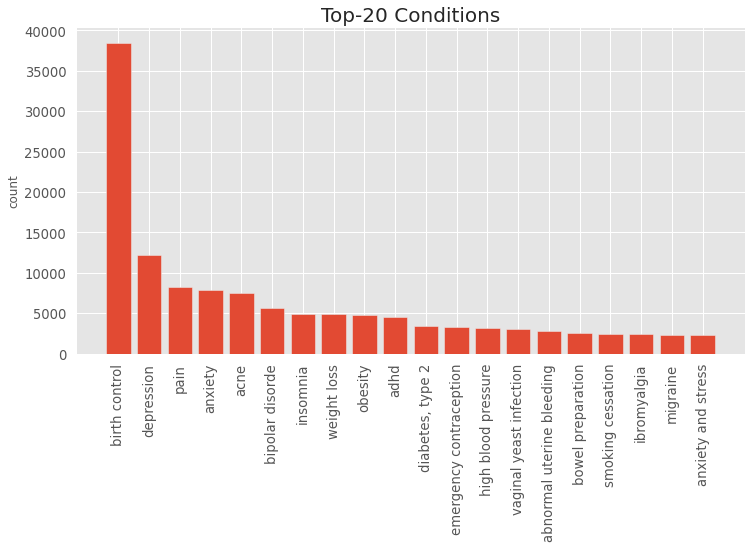

In [140]:
#check to 20 conditions
plt.figure(figsize=(12,6))
conditions = merged_data['condition'].value_counts(ascending = False).head(20)

#plot to 20 conditions
plt.bar(conditions.index,conditions.values)
plt.title('Top-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [141]:
#lets check the number of drugs/condition
merged_data.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(20)

condition
not listed / othe                             253
pain                                          219
birth control                                 181
high blood pressure                           146
acne                                          127
depression                                    115
rheumatoid arthritis                          107
diabetes, type 2                               97
allergic rhinitis                              95
insomnia                                       85
osteoarthritis                                 84
bipolar disorde                                82
anxiety                                        81
abnormal uterine bleeding                      77
endometriosis                                  64
3</span> users found this comment helpful.     62
psoriasis                                      61
migraine                                       60
adhd                                           58
4</span> users found this comment helpfu

If we look above the top value is not listed/othe. 
* It might be possible that the user didn't mentioned his/her condition as sometimes doesn't want to reveal thier disorders. We can look up the drug names and fill up the conditions for which that drug is used.

* Another point to note here is that there are values is conditions like '3 <'/span> user found this comment helpful', 4<'/span> users found this comment helpful. These are the noises present in our dataset. The dataset appears to have been extracted through webscraping, the values are wrongly fed in here. Let's investigate it.

##### Let's look at ''3 <'/span> user found this comment helpful'

In [142]:
span_data = merged_data[merged_data['condition'].str.contains('</span>',case=False,regex=True) == True]
print('Number of rows with </span> values : ', len(span_data))
noisy_data_ = 100 * (len(span_data)/merged_data.shape[0])
print('Total percent of noisy data {} %  '.format(noisy_data_))

Number of rows with </span> values :  1171
Total percent of noisy data 0.5444916140851751 %  


 There are only 0.55 % values with  </span  type data

In [143]:
merged_data.drop(span_data.index, axis = 0, inplace=True)

#### Now let's look at the not listed/other

In [144]:
not_listed = merged_data[merged_data['condition'] == 'not listed / othe']
print('Number of not_listed values : ', len(not_listed))
percent_not_listed = 100 * len(not_listed)/merged_data.shape[0]
print('Total percent of noisy data {} %  '.format(percent_not_listed))

Number of not_listed values :  592
Total percent of noisy data 0.2767751949582032 %  


There are 253 unique drugs for "not / listed othe "  values. There are 2 options  to deal with these values  
1. Check the condition associated with the drugs and replace the values.
2. We can drop the values as these only accounts for 0.27 % of total data.

To save our time we will drop the nosiy data.

In [145]:
merged_data.drop(not_listed.index, axis = 0, inplace=True)

In [146]:
merged_data.shape[0]

213300

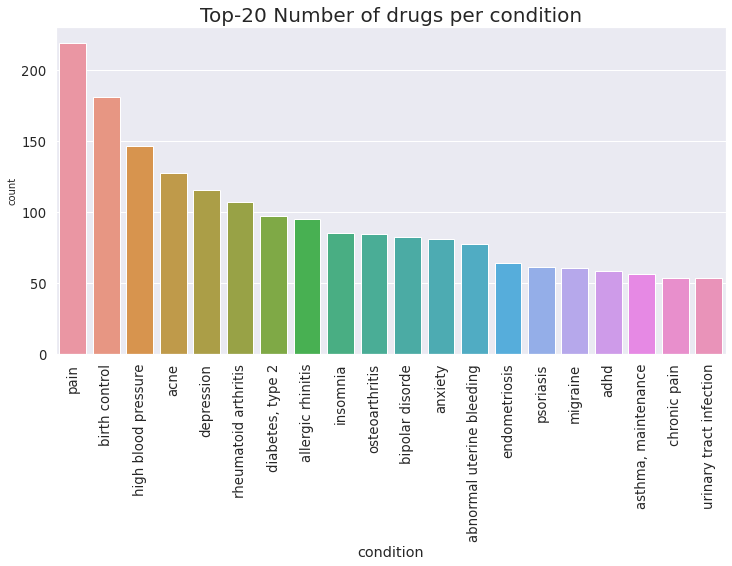

In [147]:
#lets check the number of drugs present in our dataset condition wise
conditions_gp = merged_data.groupby('condition')['drugName'].nunique().sort_values(ascending=False)

#plot the top 20
# Setting the Parameter
condition_gp_top_20 = conditions_gp.head(20)
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]
sns.barplot(x = condition_gp_top_20.index, y = condition_gp_top_20.values)
plt.title('Top-20 Number of drugs per condition',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('count',fontsize=10)
plt.show()

As we can see in the graph Top-7 Conditions have drugs about 100 or greater than 100. ! condition have multiple drugs.

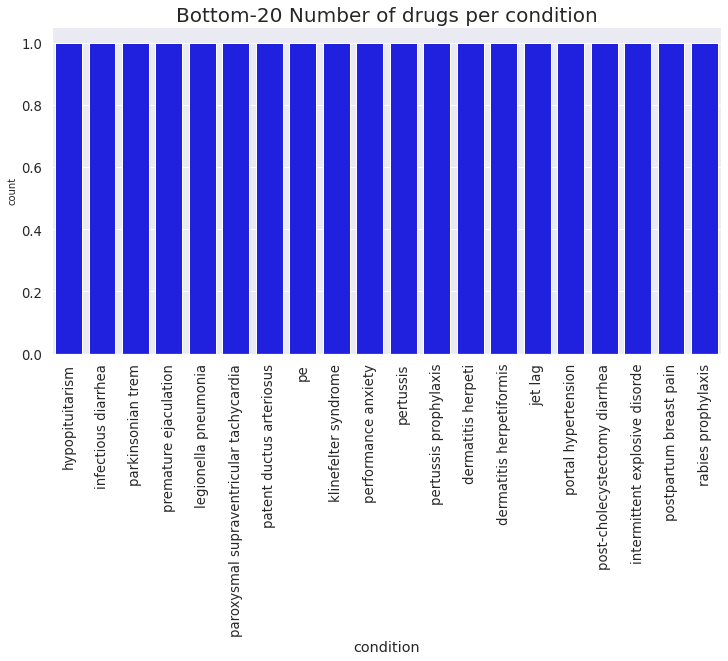

In [148]:
#bottom-20
condition_gp_bottom_20 = conditions_gp.tail(20)
#plot the top 20
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]
sns.barplot(x = condition_gp_bottom_20.index, y = condition_gp_bottom_20.values,color='blue')
plt.title('Bottom-20 Number of drugs per condition',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('count',fontsize=10)
plt.show()

Bottom-20 conditions just have single drugs.

In [149]:
#let's check if a single drug is used for multiple conditions
drug_multiple_cond = merged_data.groupby('drugName')['condition'].nunique().sort_values(ascending=False)
drug_multiple_cond.head(10)

drugName
Prednisone       38
Gabapentin       30
Ciprofloxacin    24
Doxycycline      24
Amitriptyline    23
Venlafaxine      22
Metronidazole    22
Dexamethasone    21
Triamcinolone    19
Azithromycin     19
Name: condition, dtype: int64

There are drugs which are used for multiple conditions.

In [150]:
ratings_ = merged_data['rating'].value_counts().sort_values(ascending=False).reset_index().\
                    rename(columns = {'index' :'rating', 'rating' : 'counts'})
ratings_['percent'] = 100 * (ratings_['counts']/merged_data.shape[0])
print(ratings_)

   rating  counts    percent
0      10   67466  31.629630
1       9   36381  17.056259
2       1   28733  13.470699
3       8   24819  11.635724
4       7   12435   5.829817
5       5   10635   4.985935
6       2    9183   4.305204
7       3    8646   4.053446
8       6    8386   3.931552
9       4    6616   3.101735


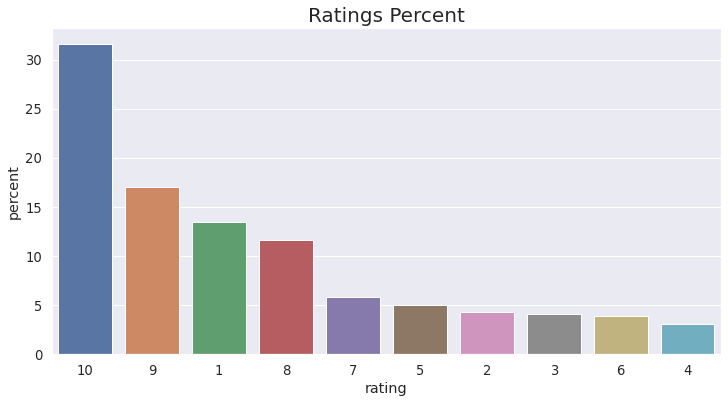

In [151]:
#let's plot and check
sns.barplot(x = ratings_['rating'], y = ratings_['percent'],order = ratings_['rating'])
plt.title('Ratings Percent',fontsize=20)
plt.show()

About 70% of the values have rating greater than 7.

In [152]:
#Let's check the Number of drugs with rating 10.
merged_data[merged_data['rating'] == 10]['drugName'].nunique()

2910

We have 2907 drugs with rating 10.

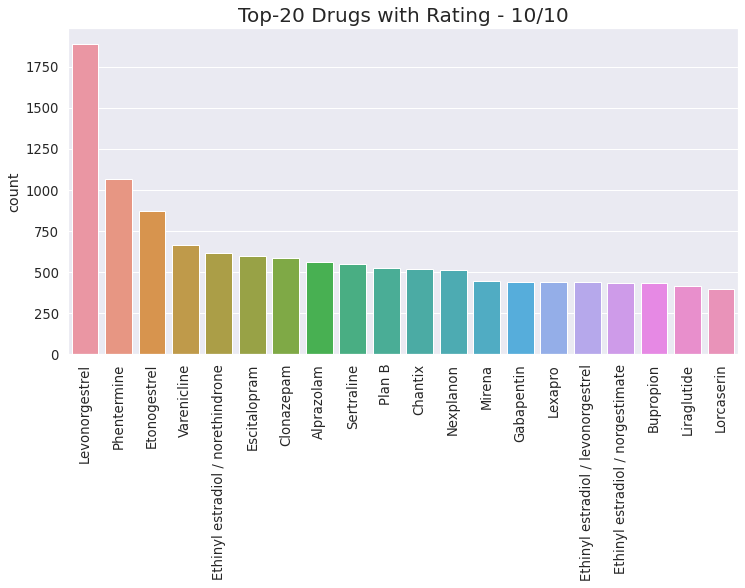

In [153]:
#Check top 20 drugs with rating=10/10
top_20_ratings = merged_data[merged_data['rating'] == 10]['drugName'].value_counts().head(20)
sns.barplot(x = top_20_ratings.index, y = top_20_ratings.values )
plt.xticks(rotation=90)
plt.title('Top-20 Drugs with Rating - 10/10', fontsize=20)
plt.ylabel('count')
plt.show()

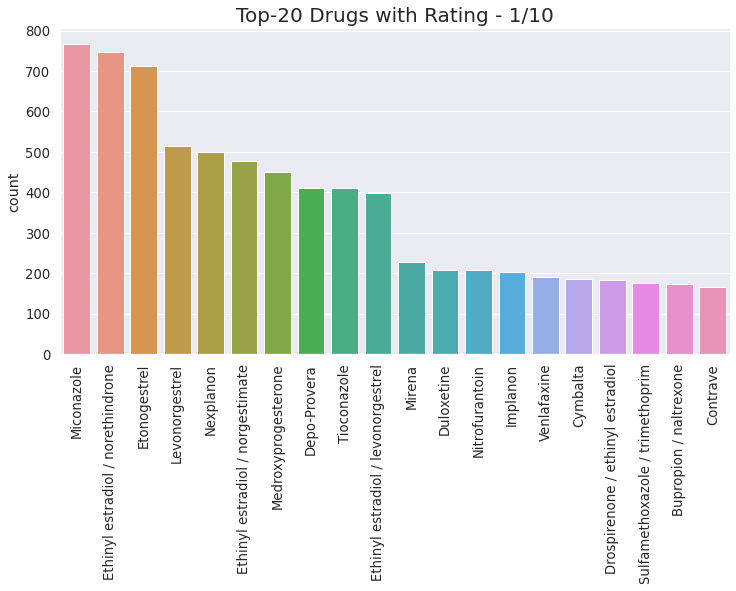

In [154]:
#check top 20 drugs with 1/10 rating

top_20_ratings_1 = merged_data[merged_data['rating'] == 1]['drugName'].value_counts().head(20)
sns.barplot(x = top_20_ratings_1.index, y = top_20_ratings_1.values )
plt.xticks(rotation=90)
plt.title('Top-20 Drugs with Rating - 1/10', fontsize=20)
plt.ylabel('count')
plt.show()

In [155]:
# convert date to datetime and create year andd month features

merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['year'] = merged_data['date'].dt.year
merged_data['month'] = merged_data['date'].dt.month

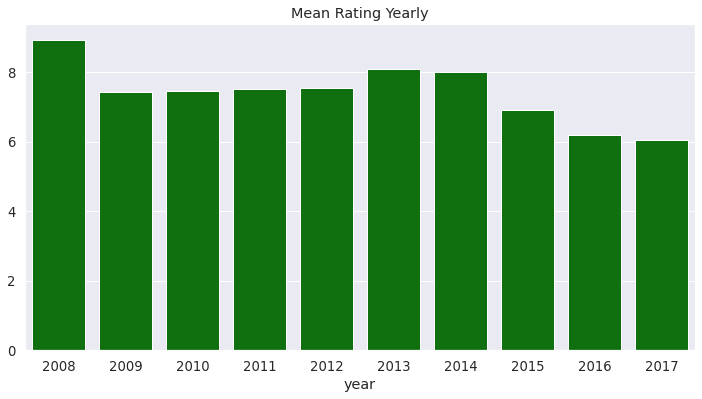

In [156]:
#check average rating per year
yearly_mean_rating = merged_data.groupby('year')['rating'].mean()
sns.barplot(yearly_mean_rating.index,yearly_mean_rating.values,color='green')
plt.title('Mean Rating Yearly')
plt.show()

The year 2015, 2016 and 2017 accounts for the most reviews. Almost 60% of the reviews are from these years.

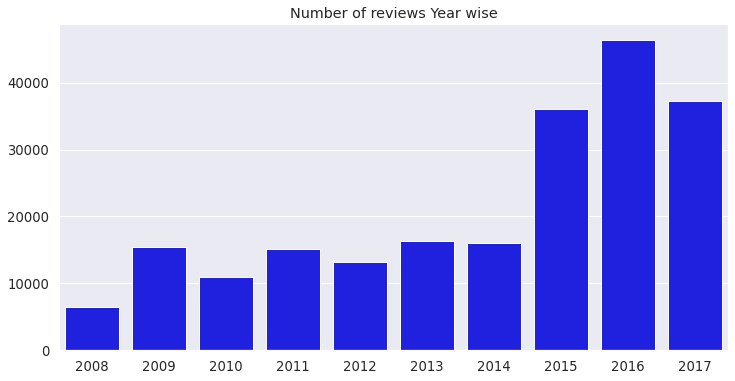

In [157]:
#plot number of reviews year wise
count_reviews = merged_data['year'].value_counts().sort_index()
sns.barplot(count_reviews.index,count_reviews.values,color='blue')
plt.title('Number of reviews Year wise')
plt.show()

From above 2 graphs we have seen that as the number of reviews has increased in the year 2015, 2016 and 2017. The rating has decreased.

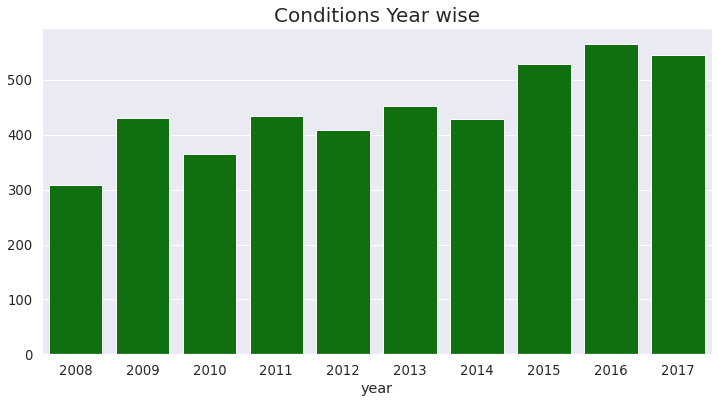

In [158]:
#check year wise drug counts and year wise conditions counts

year_wise_condition = merged_data.groupby('year')['condition'].nunique()
sns.barplot(year_wise_condition.index,year_wise_condition.values,color='green')
plt.title('Conditions Year wise',fontsize=20)
plt.show()

Condition has increased in last 3 years.

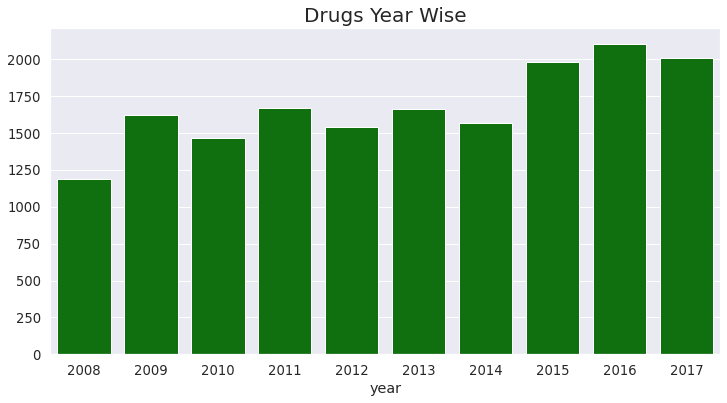

In [159]:
#check drugs year wise

year_wise_drug = merged_data.groupby('year')['drugName'].nunique()
sns.barplot(year_wise_drug.index,year_wise_drug.values,color='green')
plt.title('Drugs Year Wise',fontsize=20)
plt.show()

Number of drugs has also increased in last three years.

### Check the distribution of usefulCount

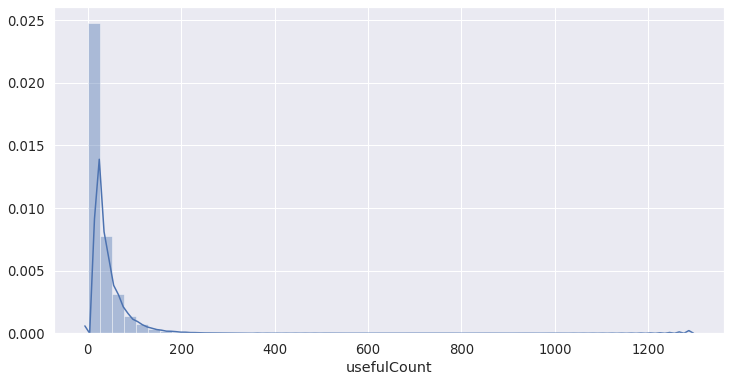

In [160]:
sns.distplot(merged_data['usefulCount'])
plt.show()

In [161]:
merged_data['usefulCount'].describe() #check the descriptive summary

count    213300.000000
mean         28.154435
std          36.427568
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulCount, dtype: float64

In [162]:
merged_data.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
year              0
month             0
dtype: int64

In [163]:
# drop the null values
merged_data.dropna(inplace=True, axis=0)

### Pre-Processing Reviews

In [172]:
#check first three reviews
for i in merged_data['review'][0:3]:
    print(i,'\n')

"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil" 

"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective." 

"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestod

Steps for reviews pre-processing.
* Remove HTML tags
* Remove Stop Words
* Remove symbols and special characters

In [179]:
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stops = set(stopwords.words('english'))

stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [180]:
merged_data['review'] = merged_data['review'].apply(review_to_words)

In [181]:
#create sentiment feature from ratings
#if rating > 5 sentiment = 1 (positive)
#if rating < 5 sentiment = 0 (negative)
merged_data['sentiment'] = merged_data["rating"].apply(lambda x: 1 if x > 5 else 0)

We will predict the sentiment using the reviews only.

## Building Model

In [165]:
#import all the necessary packages

from sklrean.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [188]:
# Creates TF-IDF vectorizer and transforms the corpus
vectorizer = TfidfVectorizer()
reviews_corpus = vectorizer.fit_transform(merged_data.review)
reviews_corpus.shape

(212106, 34618)

In [189]:
#dependent feature
sentiment = merged_data['sentiment']
sentiment.shape

(212106,)

In [191]:
#split the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reviews_corpus,sentiment,test_size=0.33,random_state=42)
print('Train data shape ',X_train.shape,Y_train.shape)
print('Test data shape ',X_test.shape,Y_test.shape)

Train data shape  (142111, 34618) (142111,)
Test data shape  (69995, 34618) (69995,)


### Apply Multinomial Naive Bayes

In [192]:
#fit the model and predicct the output

clf = MultinomialNB().fit(X_train, Y_train)

pred = clf.predict(X_test)

print("Accuracy: %s" % str(clf.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

Accuracy: 0.7585256089720694
Confusion Matrix
[[ 4553   632]
 [16270 48540]]


We have got accuracy score of 75.8% by using NaiveBayes

### Apply RandomForest

In [193]:
#fit the model and predicct the output

clf = RandomForestClassifier().fit(X_train, Y_train)

pred = clf.predict(X_test)

print("Accuracy: %s" % str(clf.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

Accuracy: 0.8978498464176012
Confusion Matrix
[[14178   505]
 [ 6645 48667]]


By using Randomforest we have 89.8 % accuracy.

References -  

* https://www.kaggle.com/sumitm004/eda-and-sentiment-analysis 
* https://www.kaggle.com/chocozzz/recommendation-medicines-by-using-a-review